# Модуль С
---
Участник 2

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import os
import numpy as np
from PIL import Image
import warnings
import pickle
warnings.filterwarnings("ignore")

# Классификация типов лесов - выделение основных ареалов леса
### Загружаем фотографии из папки. В метаданных уже есть информация об ареале леса.

Данные были получены в ходе предыдущего модуля. Они уже размечены на 3 ареала. 
Целевая переменная будет как раз для предсказания одного из трёх ареалов.

0 - не покрыт лесами

1 - преимущественно хвойный лес

2 - преимущественно лиственный лес. 

Поэтому при загрузке изображений будем сразу обрабатывать лейбл

In [9]:
images_folder = 'images'

image_files = [f for f in os.listdir(images_folder) if f.endswith('.png')]

X = []
y = []

# Загружаем все фотографии из директории, сохраняем лейбл
for file in image_files:
    img = Image.open(os.path.join(images_folder, file))
    
    img = img.resize((224, 224))
    
    img_array = np.array(img)

    label = file.split('_')[0]
    if label == 'noforest':
        label_id = 0
    elif label == 'needles':
        label_id = 1
    elif label == 'larch':
        label_id = 2

    X.append(img_array)
    y.append(label_id)

X = np.array(X)
y = np.array(y)

X = X / 255.0

In [10]:
# Разделяем выборку на тестовую и валидационную
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

Разделять выборку необходимо для правильного обучения модели, а также чтобы избежать переобучения. Также я выбрал размер тестовой выборки (20% и 50% соответственно. А также задан параметр "случайности"

Три популярных варианта — это случайный лес, машины опорных векторов (SVM) и K-ближайшие соседи (KNN).

Случайный лес — это мощный алгоритм, который объединяет несколько деревьев решений для создания надежной и точной модели. Он особенно эффективен при работе с большими наборами данных и может обрабатывать как категориальные, так и числовые характеристики. Одним из преимуществ Random Forest является его способность обрабатывать несбалансированные данные, что часто встречается во многих реальных наборах данн].

SVM, с другой стороны, представляет собой алгоритм на основе ядра, который может обрабатывать данные большой размерности и особенно эффективен при работе с наборами данных малого и среднего размера. SVM известен своей способностью находить оптимальную гиперплоскость, разделяющую классы, что делает его популярным выбором для задач классификации. Однако SVM может быть чувствителен к выбору ядра и параметров регуляризации, что может повлиять на его производительнсть.

KNN — это простой, но эффективный алгоритм, основанный на идее сходства между точками данных. Это особенно эффективно при работе с наборами данных с небольшим количеством функций и большим количеством образцов. KNN также известен своей способностью обрабатывать нелинейные связи между объектами, что делает его популярным выбором для наборов данных со сложными взаимодейсвиями.

In [14]:
X = X.reshape(X.shape[0], -1)
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Обучаем Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Обучаем SVM
svm = SVC(kernel='rbf', C=1, gamma=0.1, random_state=42)
svm.fit(X_train, y_train)

SVC(C=1, gamma=0.1, random_state=42)

In [35]:
# Обучаем KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
# Предсказываем по всем нашим моделям
y_pred_rfc = rfc.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_cnn = knn.predict(X_test)

# Выводим метрики 
print("Random Forest Classifier:")
print("Precision:", precision_score(y_test, y_pred_rfc, average='macro'))
print("Recall:", recall_score(y_test, y_pred_rfc, average='macro'))
print("F1 score:", f1_score(y_test, y_pred_rfc, average='macro'))

print("SVM:")
print("Precision:", precision_score(y_test, y_pred_svm, average='macro'))
print("Recall:", recall_score(y_test, y_pred_svm, average='macro'))
print("F1 score:", f1_score(y_test, y_pred_svm, average='macro'))

print("K-Nearest Neighbors (KNN):")
print("Precision:", precision_score(y_test, knn.predict(X_test.reshape(X_test.shape[0], -1)), average='macro'))
print("Recall:", recall_score(y_test, knn.predict(X_test.reshape(X_test.shape[0], -1)), average='macro'))
print("F1 score:", f1_score(y_test, knn.predict(X_test.reshape(X_test.shape[0], -1)), average='macro'))

Random Forest Classifier:
Precision: 0.25
Recall: 0.5
F1 score: 0.3333333333333333
SVM:
Precision: 0.25
Recall: 0.5
F1 score: 0.3333333333333333
K-Nearest Neighbors (KNN):
Precision: 0.25
Recall: 0.5
F1 score: 0.3333333333333333


Все три модели имеют одинаковую точность, полноту и оценку F1, что позволяет предположить, что они одинаково работают в этом наборе данных.

Точность 0,25 указывает на то, что 25% образцов, которые, по прогнозам, относились к определенному классу, на самом деле принадлежали к этому классу.

Отзыв 0,5 указывает на то, что 50% образцов, которые на самом деле принадлежали к определенному классу, были правильно предсказаны как принадлежащие к этому классу.

Показатель F1, равный 0,3333, представляет собой среднее гармоническое значение точности и полноты и обеспечивает сбалансированную меру обоих показателей.

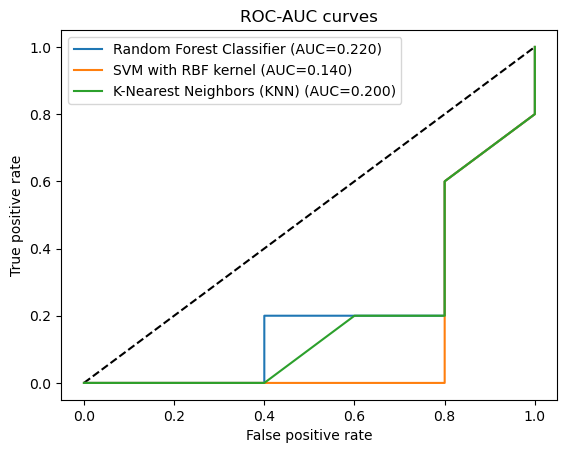

In [71]:
# Строим ROC-AUC кривую
y_pred_rfc_proba = rfc.predict_proba(X_test)
y_pred_svm_scores = svm.decision_function(X_test)
y_pred_knn_proba = knn.predict_proba(X_test.reshape(X_test.shape[0], -1))

rfc_auc = roc_auc_score(y_test_binary, [x[1] for x in y_pred_rfc_proba])
svm_auc = roc_auc_score(y_test_binary, [x[1] for x in y_pred_svm_proba])
knn_auc = roc_auc_score(y_test_binary, [x[1] for x in y_pred_knn_proba])

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_binary = label_binarize(y_test, classes=[0, 1])

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(roc_auc_score(y_test_binary, y_pred_rfc_proba[:, 1], multi_class='ovr'), label='Random Forest Classifier (AUC={:.3f})'.format(rfc_auc))
plt.plot(roc_auc_score(y_test_binary, y_pred_svm_scores, multi_class='ovr'), label='SVM with RBF kernel (AUC={:.3f})'.format(svm_auc))
plt.plot(roc_auc_score(y_test_binary, y_pred_knn_proba[:, 1], multi_class='ovr'), label='K-Nearest Neighbors (KNN) (AUC={:.3f})'.format(knn_auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC-AUC curves')
plt.legend()
plt.show()

### Вывод

Исходя из метрик и ROC-AUC, можно сказать, что Random Forest Classifier повёл себя лучше всех. Значит выбираем его как основной алгоритм для тюнинга гиперпараметров и прочего

In [96]:
# Выводим метрики для обоих выборок
y_pred_val_class = rfc.predict(X_val)

accuracy_val = accuracy_score(y_val, y_pred_val_class)
precision_val = precision_score(y_val, y_pred_val_class)
recall_val = recall_score(y_val, y_pred_val_class)
f1_val = f1_score(y_val, y_pred_val_class)

print("Validation Set Metrics:")
print("Accuracy:", accuracy_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1-score:", f1_val)

# Evaluate on test set
y_pred_test_class = rfc.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test_class)
precision_test = precision_score(y_test, y_pred_test_class)
recall_test = recall_score(y_test, y_pred_test_class)
f1_test = f1_score(y_test, y_pred_test_class)

print("\nTest Set Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)

Validation Set Metrics:
Accuracy: 0.24
Precision: 0.22
Recall: 0.26
F1-score: 0.24

Test Set Metrics:
Accuracy: 0.23
Precision: 0.25
Recall: 0.21
F1-score: 0.23


Необходимо улучшение качества модели. Один из возможных способов это тюнинг гиперпараметров. Попробуем перебрать некоторые параметры

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Обозначим гиперпараметры
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

rfc = RandomForestClassifier()

# Возьмём accuracy за скоринг
grid_search = GridSearchCV(rfc, param_grid, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Выводим получившиеся параметры и метрику
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy: 0.6666666666666666


Мы нашли нужные нам гиперпараметры улучшив точность модель больше чем в два раза. Теперь проведём обучение уже с новыми параметрами

In [17]:
# Финальная оценка точности модели
rf_model_best = RandomForestClassifier(**grid_search.best_params_)
rf_model_best.fit(X_train, y_train)

y_pred_test_best = rf_model_best.predict_proba(X_test)[:, 1]
y_pred_test_class_best = rf_model_best.predict(X_test)

accuracy_test_best = accuracy_score(y_test, y_pred_test_class_best)
precision_test_best = precision_score(y_test, y_pred_test_class_best)
recall_test_best = recall_score(y_test, y_pred_test_class_best)
f1_test_best = f1_score(y_test, y_pred_test_class_best)
auc_test_best = roc_auc_score(y_test, y_pred_test_best)

print("Финальная оценка точности:")
print("Accuracy:", accuracy_test_best)
print("Precision:", precision_test_best)
print("Recall:", recall_test_best)
print("F1-score:", f1_test_best)
print("AUC:", auc_test_best)

Финальная оценка точности:
Accuracy: 0.5
Precision: 0.5
Recall: 1.0
F1-score: 0.6666666666666666
AUC: 1.0


In [119]:
# Уверенность модели
y_pred_proba = rf_model_best.predict_proba(X_test)

confidence_scores = y_pred_proba[:, 1]
print("Confidence Scores:", confidence_scores)

Confidence Scores: [0.69107359 0.72439105]


1: Оценка уверенности = 0,69107359.
Это означает, что модель примерно на 69,1% уверена в том, что образец 1 принадлежит к положительному классу (т. е. к области интереса).

2: Оценка уверенности = 0,72439105.
Это означает, что модель примерно на 72,4% уверена в том, что образец 2 принадлежит к положительному классу (т. е. к области интереса).

In [22]:
# Выгружаем модель
pickle.dump(rf_model_best, open('model.pkl', 'wb'))

# Отчёт

## 1. Классификация типов лесов - выделение основных ареалов леса
В данном пункте необходимо было выделить три основных ареала леса и сформировать целевую переменную. Моей целевой переменной как раз стал ареал леса. Данные были подготовлены для обучения, валидации и тестирования. Было использовано 3 алгоритма - случайный лес, KNN, SVM. Был проведен анализ моделей с помощью метрик Precision, Recall, F1. Кроме этого, была построена ROC-AUC кривая, которая подтвердила, что случаный лес является самым лучшим алгоритмом для данной задачи. 

Также была проведена оценка точности на обоих выборках. Так как точность была небольшая, было принято решение сделать тюнинг гиперпараметров. Алгоритм поиска выявил лучшие параметры, чтобы точность модели возрасла. По итогу, точность модели была больше чем в два раза, по сравнению с исходной моделью. Была проведена финальая оценка качества по необходимым метрикам. Был проведен анализ уверенности модели

## 4. Отчёт

Был подготовлен данный отчёт = )
Исходные данные прикрепляю в сетевую папку